Decision Tree

Tiatnic Survival Dataset

In [7]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets (train and test)
train_df = pd.read_csv("train.csv")  # Update with the correct file path if needed


In [3]:
# Look at the top values of train data
print("Top values of train data:")
print(train_df.head())

Top values of train data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

In [4]:
# Print the column names of train data
print("\nColumn names of train data:")
print(train_df.columns.tolist())


Column names of train data:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
# Print the dimension of train data
print("\nDimension of train data:")
print(train_df.shape)


Dimension of train data:
(891, 12)


In [6]:
# Print the number of missing values in each column of train data
print("\nMissing values in each column of train data:")
print(train_df.isnull().sum())


Missing values in each column of train data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data Visualization

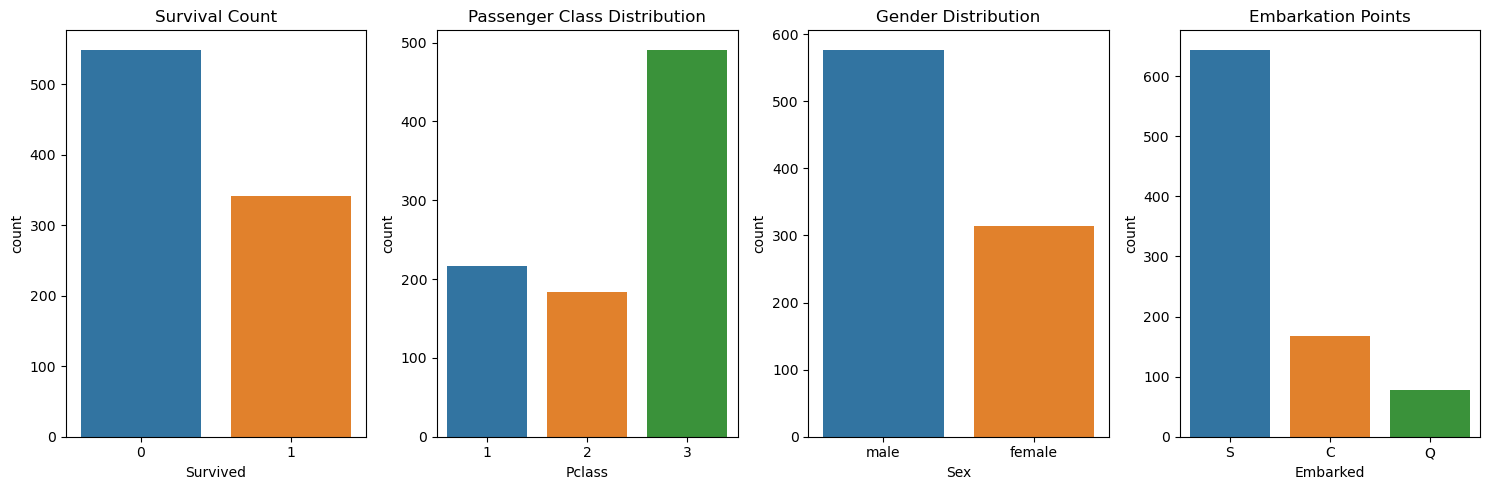

In [8]:
# Barchart of Survived, Pclass, Sex, Embarked
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.countplot(x="Survived", data=train_df)
plt.title("Survival Count ")

plt.subplot(1, 4, 2)
sns.countplot(x="Pclass", data=train_df)
plt.title("Passenger Class Distribution")

plt.subplot(1, 4, 3)
sns.countplot(x="Sex", data=train_df)
plt.title("Gender Distribution")

plt.subplot(1, 4, 4)
sns.countplot(x="Embarked", data=train_df)
plt.title("Embarkation Points")

plt.tight_layout()
plt.show()

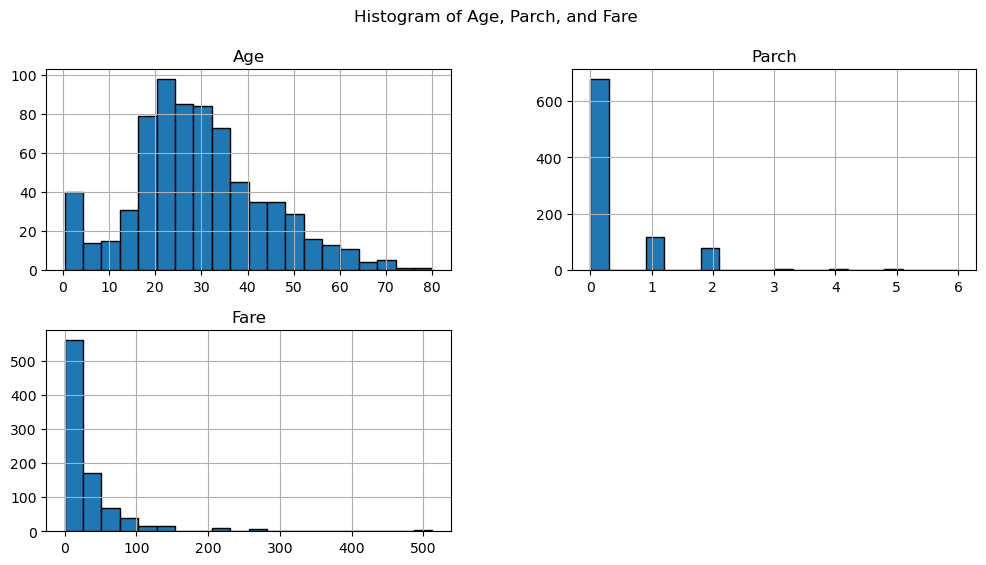

In [9]:
# Histogram of Age, Parch, Fare
train_df[['Age', 'Parch', 'Fare']].hist(figsize=(12, 6), bins=20, edgecolor="black")
plt.suptitle("Histogram of Age, Parch, and Fare")
plt.show()

C:\Users\Nithin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nithin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


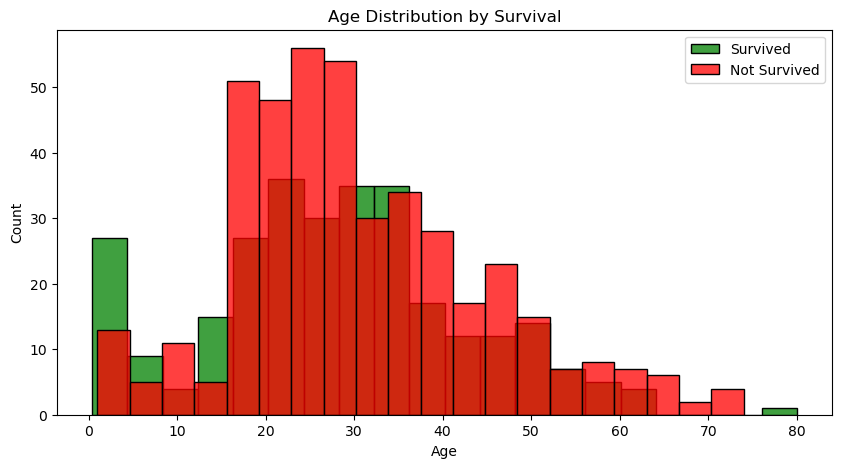

In [11]:
# Plot histogram of age for survived and not survived class
plt.figure(figsize=(10, 5))
sns.histplot(train_df[train_df["Survived"] == 1]["Age"], bins=20, label="Survived", color="green")
sns.histplot(train_df[train_df["Survived"] == 0]["Age"], bins=20,label="Not Survived", color="red")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()

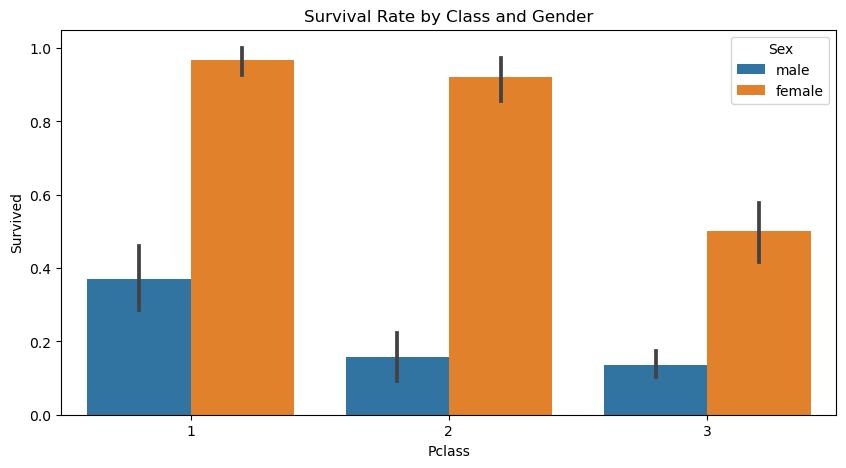

In [14]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
plt.figure(figsize=(10, 5))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train_df)
plt.title("Survival Rate by Class and Gender")
plt.show()

In [13]:
#Histogram of Age of the given data set(sample)

## Handling Missing Values

In [19]:
# Replace the missing values in Embarked column by 'S'
train_df['Embarked'].fillna('S', inplace=True)

In [20]:
# Impute the missing values in Fare column with median value
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

In [21]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

age_mean = train_df['Age'].mean()
age_std = train_df['Age'].std()
missing_ages = train_df['Age'].isnull().sum()


np.random.seed(42)  
random_ages = np.random.randint(age_mean - age_std, age_mean + age_std, missing_ages)
train_df.loc[train_df['Age'].isnull(), 'Age'] = random_ages

## Feature Engineering - Creating new features

In [22]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [23]:
# Create new feature IsAlone from FamilySize
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)

## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [24]:
# Create a new attribute HasCabin using the attribute Cabin
# If Cabin is NaN, then HasCabin = 0 (False), else HasCabin = 1 (True)
train_df['HasCabin'] = train_df['Cabin'].notnull().astype(int)

In [27]:
# Drop columns that may not be useful in survival prediction
#Drop PassengerId, Name, Ticket, and Cabin
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

## Model Building

In [29]:
#Prepare X and y
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("train.csv")  # Ensure the dataset is available in your directory

# Selecting features and target variable
X = df[['Feature1', 'Feature2']]  # Replace with actual feature columns
y = df['Target']  # Replace with actual target column

# Convert to NumPy arrays for manual calculations
X = np.array(X)
y = np.array(y)

In [30]:
# Label encoding of categorical feature

def label_encode(column):
    unique_vals = list(set(column))  # Get unique categories
    encoding_dict = {val: idx for idx, val in enumerate(unique_vals)}  # Assign numbers
    return [encoding_dict[val] for val in column], encoding_dict  # Return encoded values and mapping


df = pd.DataFrame({'Gender': ['Male', 'Female', 'Male', 'Female', 'Female']})

df['Gender_encoded'], gender_mapping = label_encode(df['Gender'])

print(df)
print("Encoding Mapping:", gender_mapping)


In [31]:
# concat df_categorical with original df
df_categorical = X.select_dtypes(include=['object'])  # Selecting categorical columns
X = pd.concat([X, df_categorical], axis=1)  # Concatenating categorical features

C:\Users\Nithin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nithin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nithin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nithin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

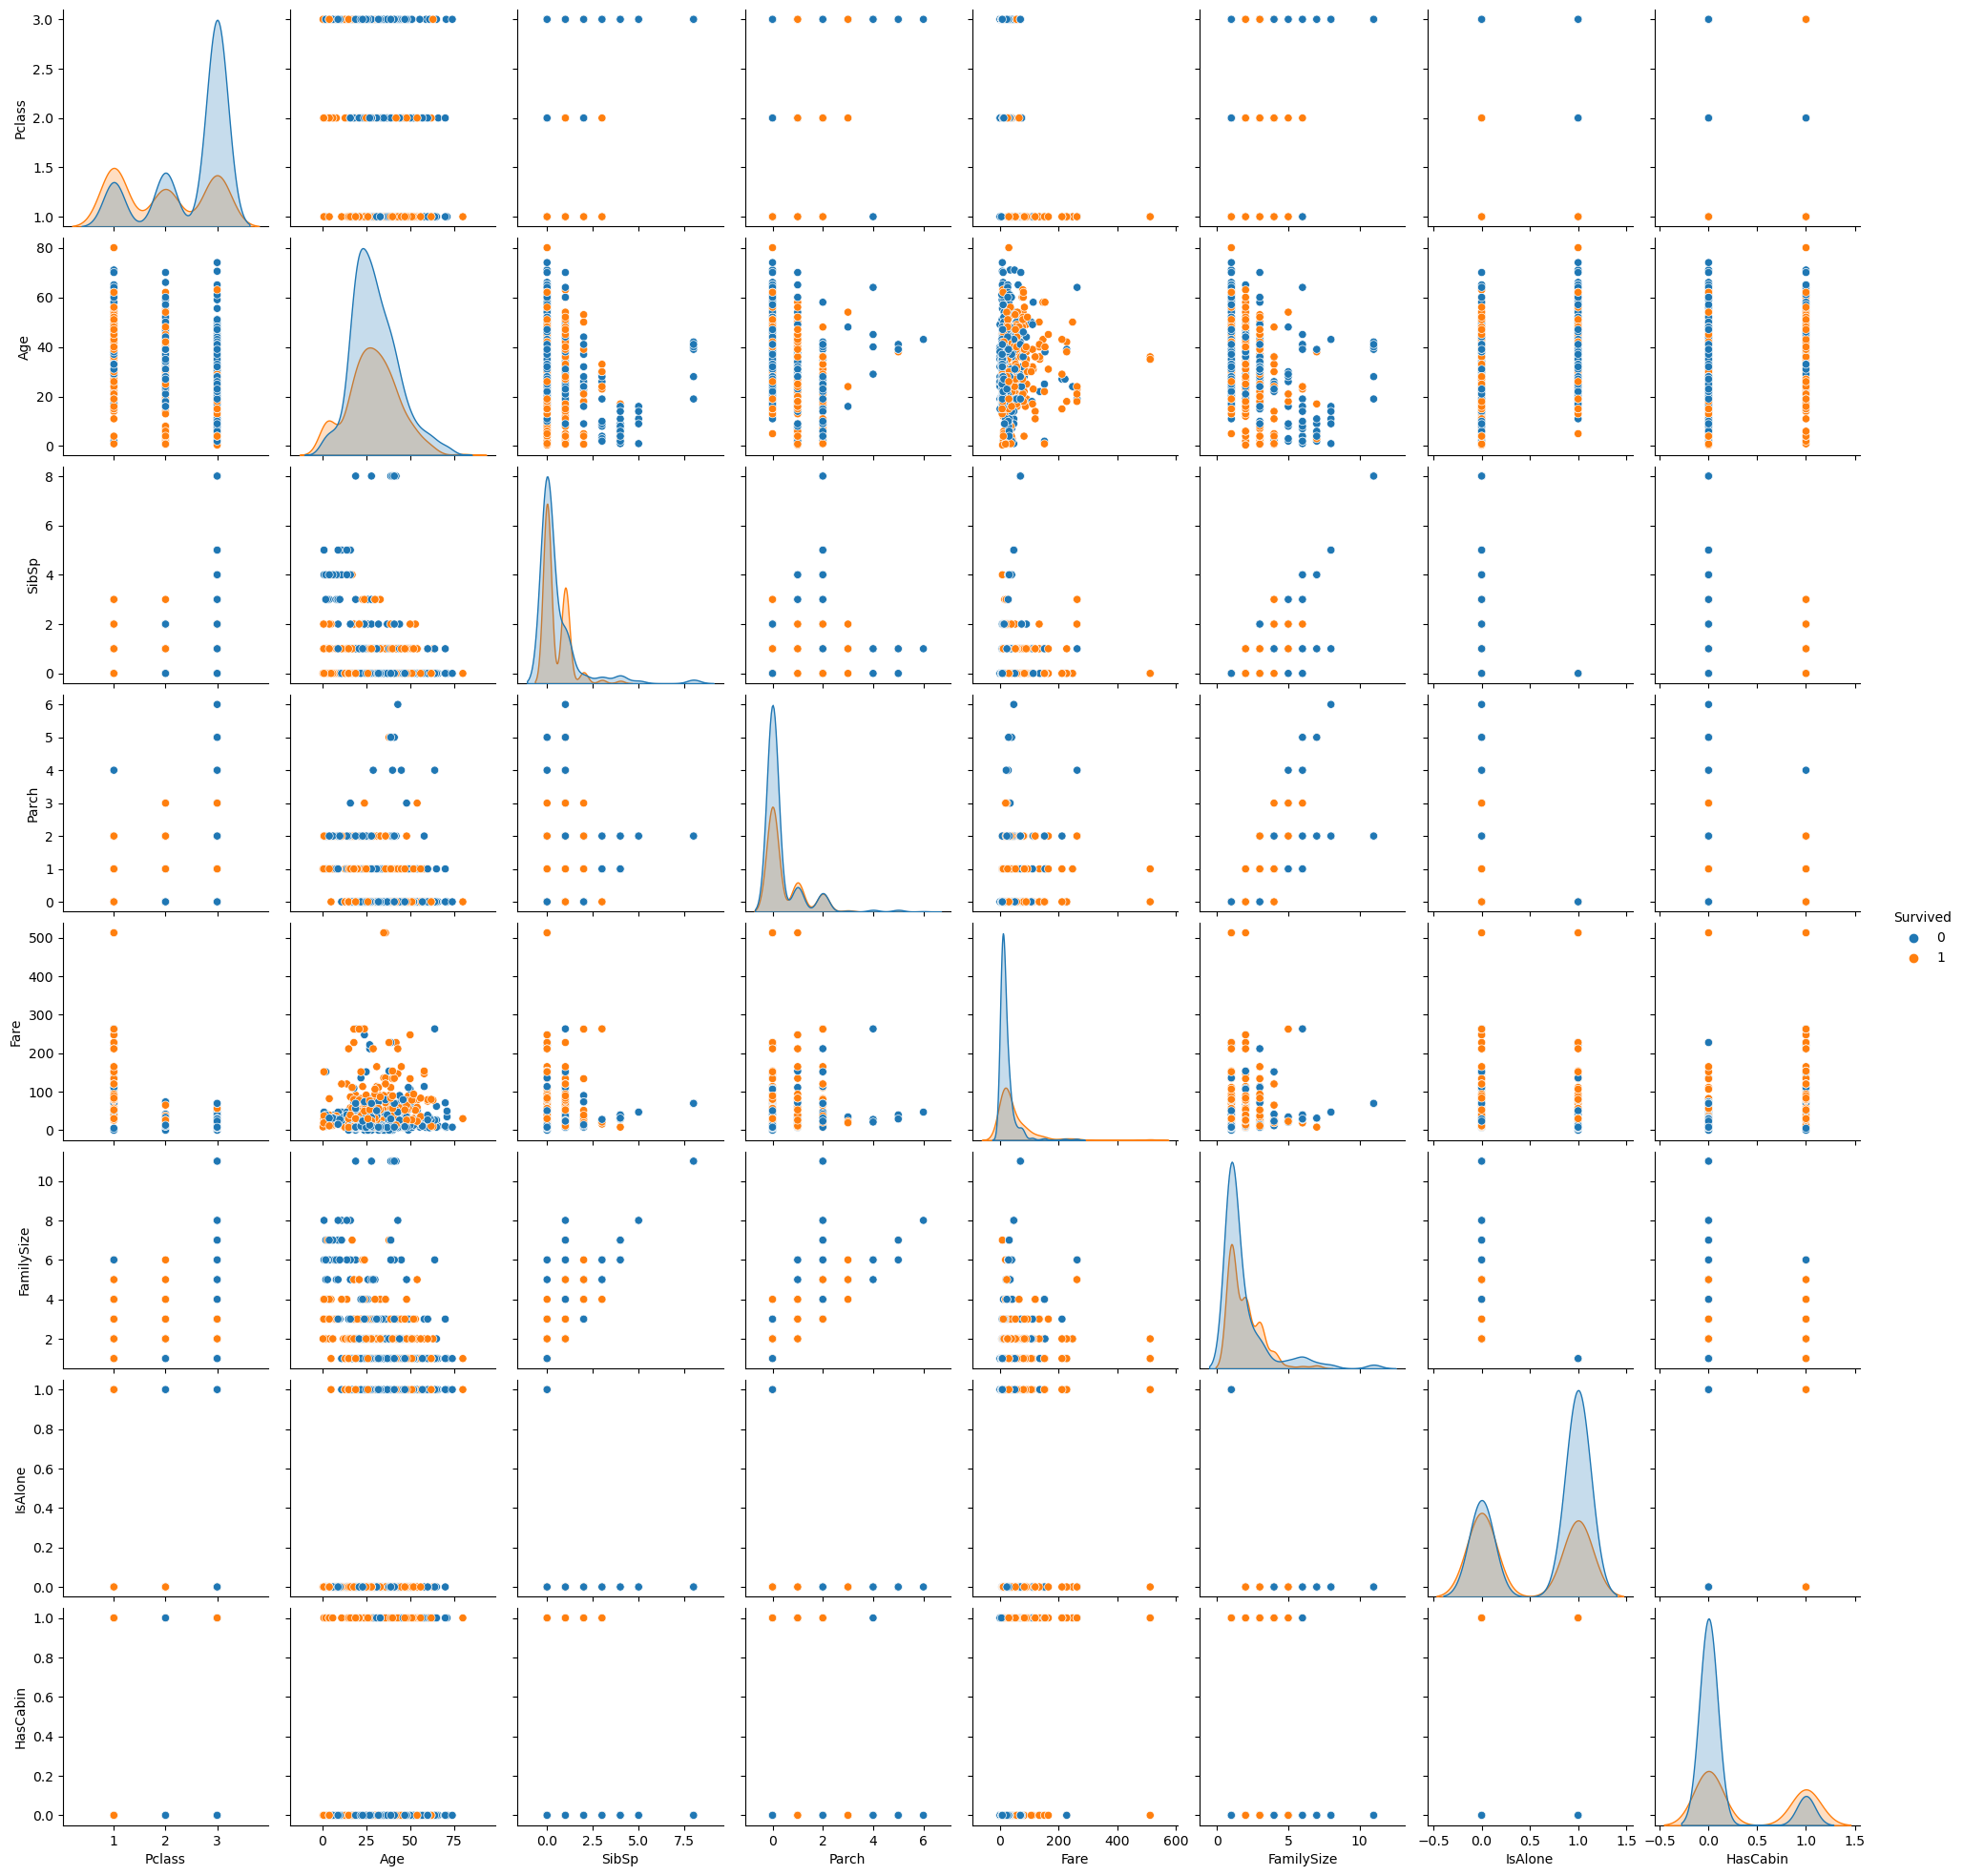

In [34]:
#Do a pairplot of all features
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize feature relationships
sns.pairplot(train_df, hue="Survived")
plt.show()


In [35]:
X

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  IsAlone  \
0         3    1  22.0      1      0   7.2500         2           2        0   
1         1    0  38.0      1      0  71.2833         0           2        0   
2         3    0  26.0      0      0   7.9250         2           1        1   
3         1    0  35.0      1      0  53.1000         2           2        0   
4         3    1  35.0      0      0   8.0500         2           1        1   
..      ...  ...   ...    ...    ...      ...       ...         ...      ...   
886       2    1  27.0      0      0  13.0000         2           1        1   
887       1    0  19.0      0      0  30.0000         2           1        1   
888       3    0  23.0      1      2  23.4500         2           4        0   
889       1    1  26.0      0      0  30.0000         0           1        1   
890       3    1  32.0      0      0   7.7500         1           1        1   

     HasCabin  
0           0  
1           1  
2           0  
3           1  
4           0  
..        ...  
886         0  
887         1  
888         0  
889         1  
890         0  

[891 rows x 10 columns]

In [36]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
from sklearn.model_selection import train_test_split

# Splitting data into 90% training and 10% validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [37]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

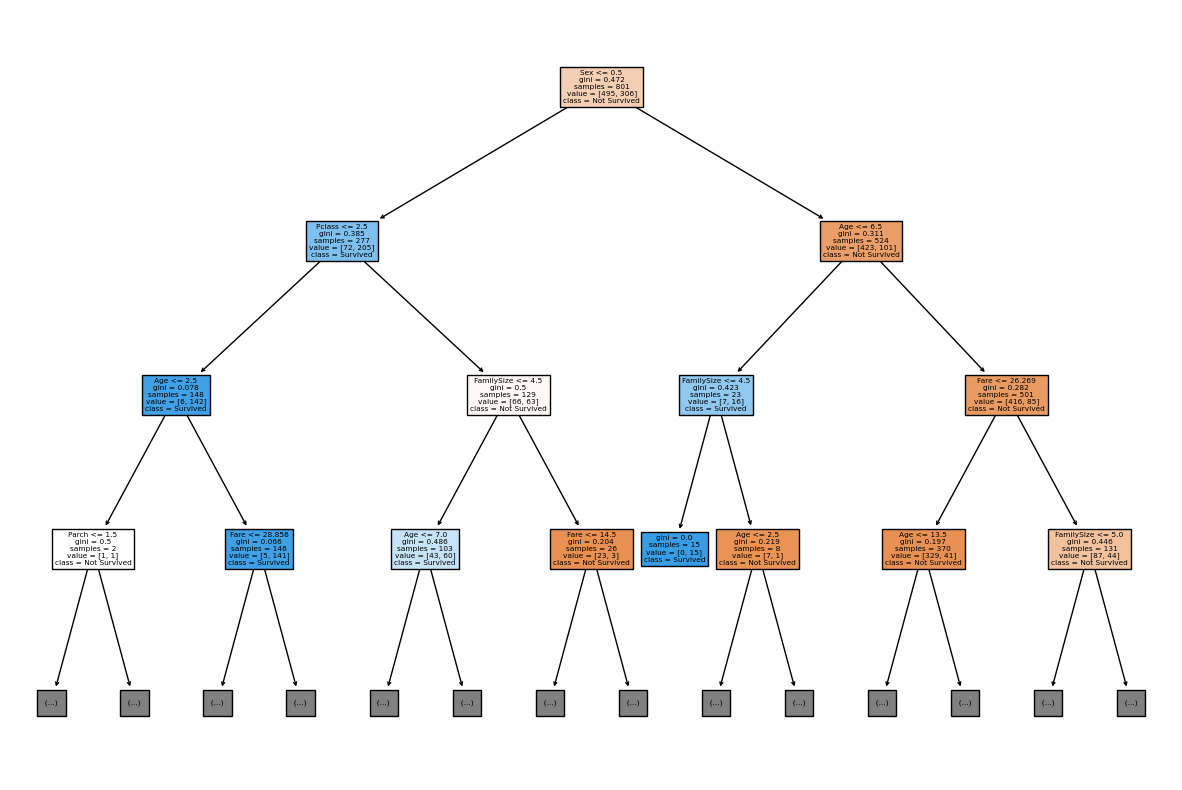

In [38]:
#Print the tree
# Importing required packages for visualization
from sklearn.tree import plot_tree

# Plot the decision tree (limiting depth for better visualization)
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"], max_depth=3)
plt.show()


<img src="tree2.png">

In [ ]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

In [ ]:
# Printing confusion matrix and accuracy

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Making predictions on validation set
y_pred = clf.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[42 12]
 [ 8 28]]
Accuracy: 0.78
Precision: 0.70
Recall: 0.78
F1 Score: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        54
           1       0.70      0.78      0.74        36

    accuracy                           0.78        90
   macro avg       0.77      0.78      0.77        90
weighted avg       0.78      0.78      0.78        90

